<a href="https://colab.research.google.com/github/ademizh/classification-salary/blob/main/classification_salary_supervisedlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи
Бинарная классификация, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

## Метрика качества
В качестве целевой метрики использовалась ROC-AUC. Для измерения ROC-AUC требуются вероятности принадлежности к классам. Для алгоритма, который принимает решение взвешенным голосованием, вероятность вычисляется как среднее взвешенное значение вероятностей по всем алгоритмам в композиции.

## Ход работы
* Загрузка данных, изучение и построение гистограммы, анализ heatmap для изучения взаимосвязей в данных.
* Обработка данны, кодирование категориальных признаков с использованием LabelEncoder и One-hot encoding.
* Разделение данных на обучающий и тестовый наборы, стандартизация данных с помощью StandardScaler.
* Обучение модели логистической регрессии, подбор оптимальных гиперпараметров с помощью GridSearchCV.
* Обучение модели случайного леса, измерение его качества с помощью метрики кросс-валидации. Подбор оптимальной глубины деревьев с использованием cross_val_score.
* Обучение модели градиентного бустинга с помощью библиотеки XGBoost с использованием оптимизации гиперпараметров с помощью Optuna.
* Обучение модели градиентного бустинга с помощью библиотеки CatBoost. Подбор оптимальной глубины деревьев с использованием cross_val_score.

* [`data_train.csv`](https://drive.google.com/file/d/1qKakViWhNT1yTiM66V9hxADAVCYTL0PO/view?usp=share_link)


# Загрузка и обработка данных

* Работа с пропущенными значениями;
* Выделение целевой переменной;
* Разбиение данных на вещественные и категориальные;
* LabelEncoder
* One-hot кодирование категориальных данных;
* Разбиение данных на train и test.
* StandardScaler


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!gdown 1qKakViWhNT1yTiM66V9hxADAVCYTL0PO

Downloading...
From: https://drive.google.com/uc?id=1qKakViWhNT1yTiM66V9hxADAVCYTL0PO
To: /content/data_train.csv
100% 1.40M/1.40M [00:00<00:00, 75.6MB/s]


In [ ]:
data = pd.read_csv('data_train.csv')

In [ ]:
data.shape

(14734, 14)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,14734.00000,1.473400e+04,14734.000000,14734.000000,14734.000000,14734.000000
mean,38.60995,1.894627e+05,10.106013,1026.190919,87.673408,40.425818
std,13.59639,1.061232e+05,2.573648,6882.931226,404.517936,12.336507
min,17.00000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.171600e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782045e+05,10.000000,0.000000,0.000000,40.000000
75%,47.00000,2.371220e+05,13.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14734 non-null  int64 
 1   workclass       14734 non-null  object
 2   fnlwgt          14734 non-null  int64 
 3   education       14734 non-null  object
 4   education-num   14734 non-null  int64 
 5   marital-status  14734 non-null  object
 6   occupation      14734 non-null  object
 7   relationship    14734 non-null  object
 8   race            14734 non-null  object
 9   sex             14734 non-null  object
 10  capital-gain    14734 non-null  int64 
 11  capital-loss    14734 non-null  int64 
 12  hours-per-week  14734 non-null  int64 
 13  >50K,<=50K      14734 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

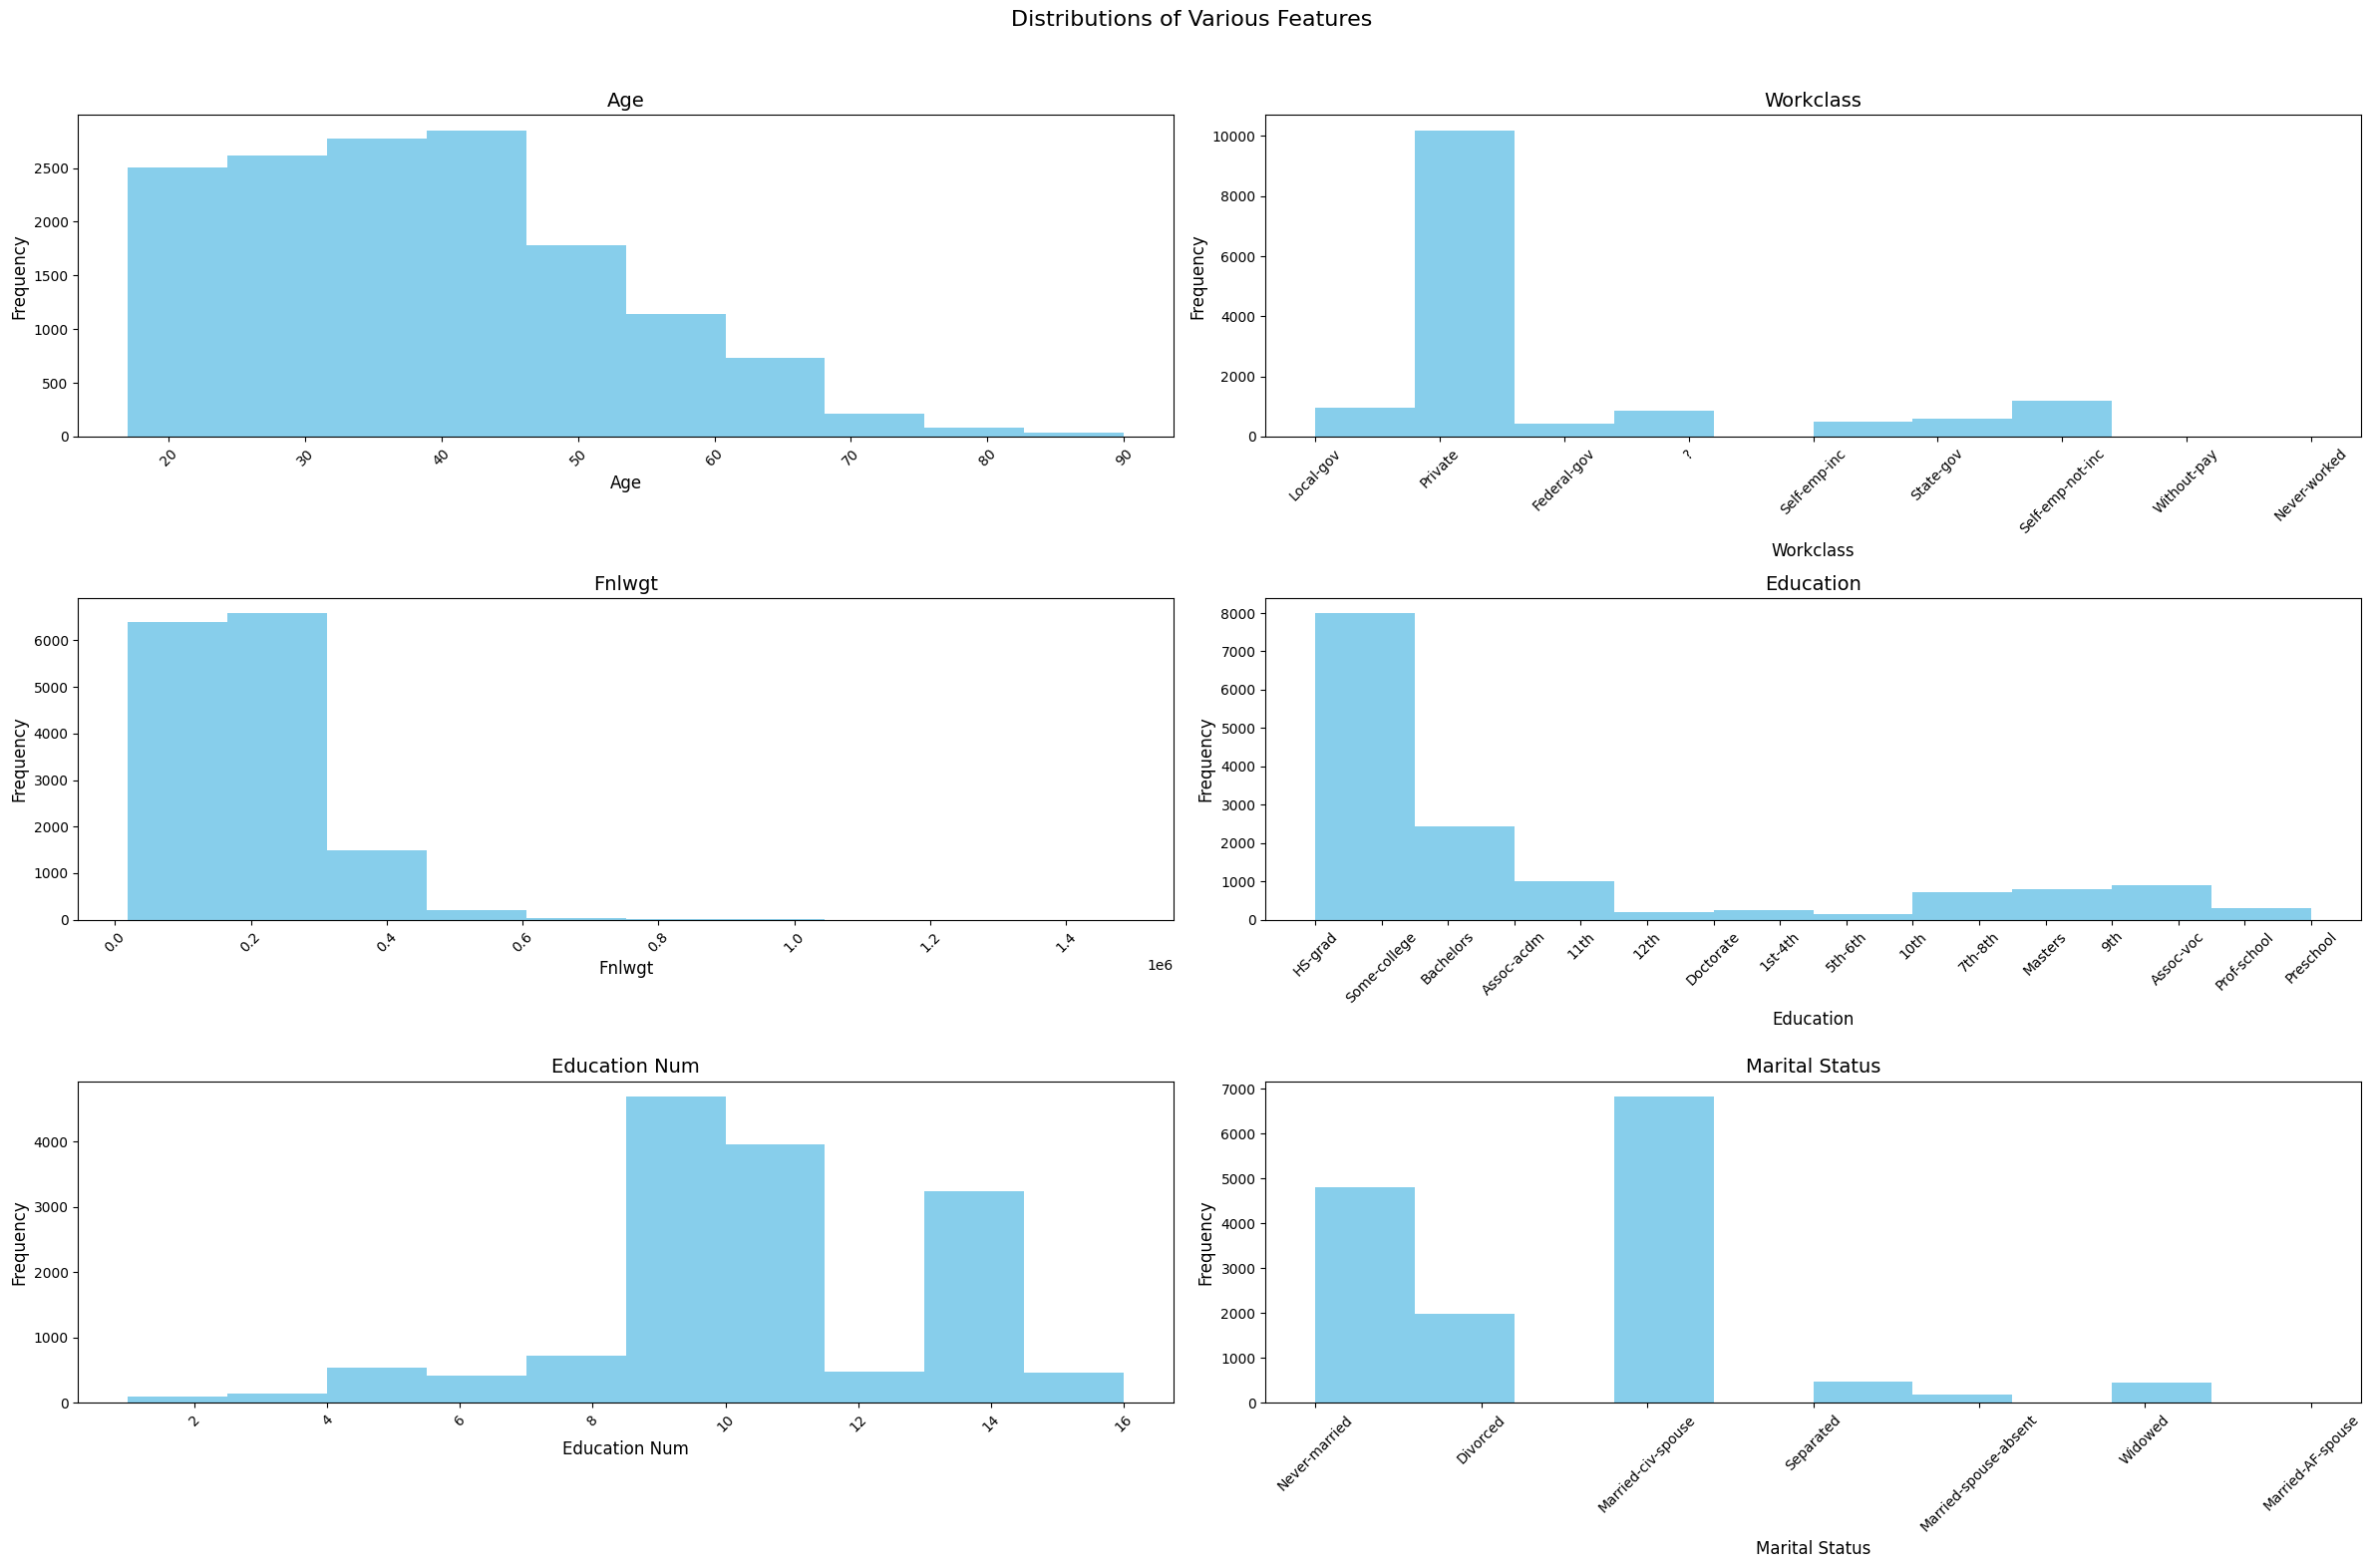

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(24, 16))
fig.suptitle('Distributions of Various Features', fontsize=16)

for ax, (key, values) in zip(axs.flat, data.items()):
    ax.hist(values, bins=10, color='skyblue')
    ax.set_title(key.replace('-', ' ').title(), fontsize=14)
    ax.set_xlabel(key.replace('-', ' ').title(), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Заменить все знаки "?" на `np.nan`

In [ ]:
data.replace('?', np.nan, inplace = True)

* Выделить вектор ответов. Закодировать правильные ответы 0 и 1:
    * '<=50K' -> 0;
    * '>50K' -> 1.
* Сохранить их в отдельную переменную `y`
* Удалить из data правильные ответы.

In [ ]:
data.columns[data.isnull().any()].tolist()

['workclass', 'occupation']

In [ ]:
data.isnull().sum()

age                 0
workclass         860
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        864
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [ ]:
data['workclass'].fillna('Missing', inplace = True)
data['occupation'].fillna('Missing', inplace = True)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

In [ ]:
data.loc[data['>50K,<=50K'] == "<=50K", '>50K,<=50K'] = 0
data.loc[data['>50K,<=50K'] == ">50K", '>50K,<=50K'] = 1
y = data['>50K,<=50K'].astype(np.int32, copy=False)
y

0        0
1        0
2        0
3        0
4        1
        ..
14729    0
14730    0
14731    0
14732    0
14733    0
Name: >50K,<=50K, Length: 14734, dtype: int32

In [ ]:
data = data.drop('>50K,<=50K', axis=1)

In [ ]:
data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40
7,18,Missing,423460,11th,7,Never-married,Missing,Own-child,White,Male,0,0,36
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40


* Выделить вещественные и категориальные признаки.

In [ ]:
real_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss',	'hours-per-week']

real_data = data[real_columns]
real_data[:10]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
5,18,446771,10,0,0,25
6,31,108464,12,0,0,40
7,18,423460,7,0,0,36
8,25,110138,9,0,0,40
9,53,167410,13,0,0,40


In [ ]:
cat_columns = ['workclass','education','marital-status','occupation','relationship','race','sex']

cat_data = data[cat_columns]
cat_data[:10]

,workclass,education,marital-status,occupation,relationship,race,sex
0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male
1,Private,Some-college,Divorced,Sales,Not-in-family,White,Male
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Own-child,White,Male
3,Private,Some-college,Never-married,Sales,Own-child,White,Female
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male
5,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male
6,Federal-gov,Assoc-acdm,Married-civ-spouse,Tech-support,Husband,White,Male
7,Missing,11th,Never-married,Missing,Own-child,White,Male
8,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male
9,Federal-gov,Bachelors,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male


# Проверить выбросы

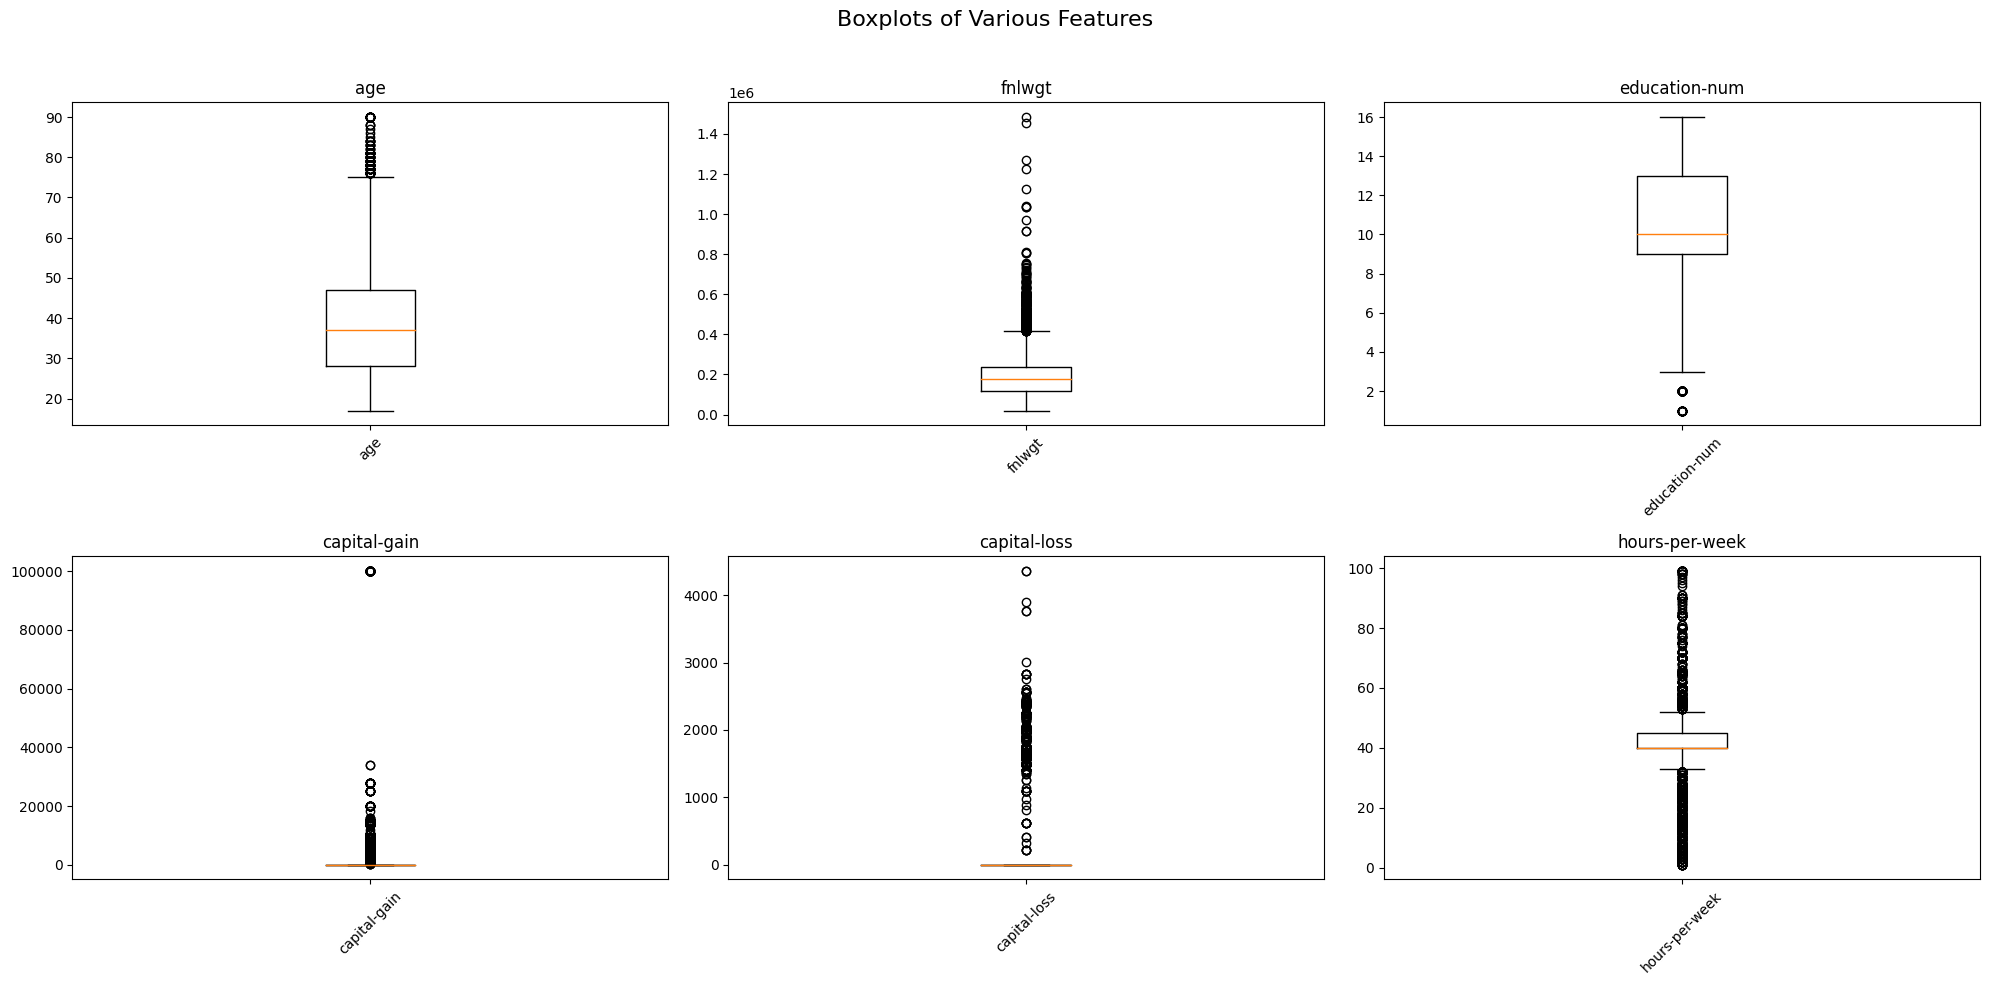

In [ ]:
real_data = pd.DataFrame(data, columns=real_columns)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Boxplots of Various Features', fontsize=16)
for ax, column in zip(axs.flatten(), real_data.columns):
    ax.set_title(column)
    ax.boxplot(real_data[column])
    ax.set_xticklabels([column], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Выбросы остаются, если убрать снижается показатель

# Label Encoder

In [ ]:
cat_data = pd.DataFrame(data, columns=cat_columns)

In [ ]:
real_data = pd.DataFrame(data, columns=real_columns)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
      encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
      result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(cat_data) # Теперь encoded data содержит закодированные кат. признаки
encoded_data

,workclass,education,marital-status,occupation,relationship,race,sex
0,1,11,4,4,1,2,1
1,4,15,0,12,1,4,1
2,1,9,2,10,3,4,1
3,4,15,4,12,3,4,0
4,4,9,2,13,0,4,1
...,...,...,...,...,...,...,...
14729,4,11,4,5,3,4,1
14730,2,8,2,7,0,4,1
14731,4,15,2,2,0,4,1
14732,4,11,4,12,3,4,1


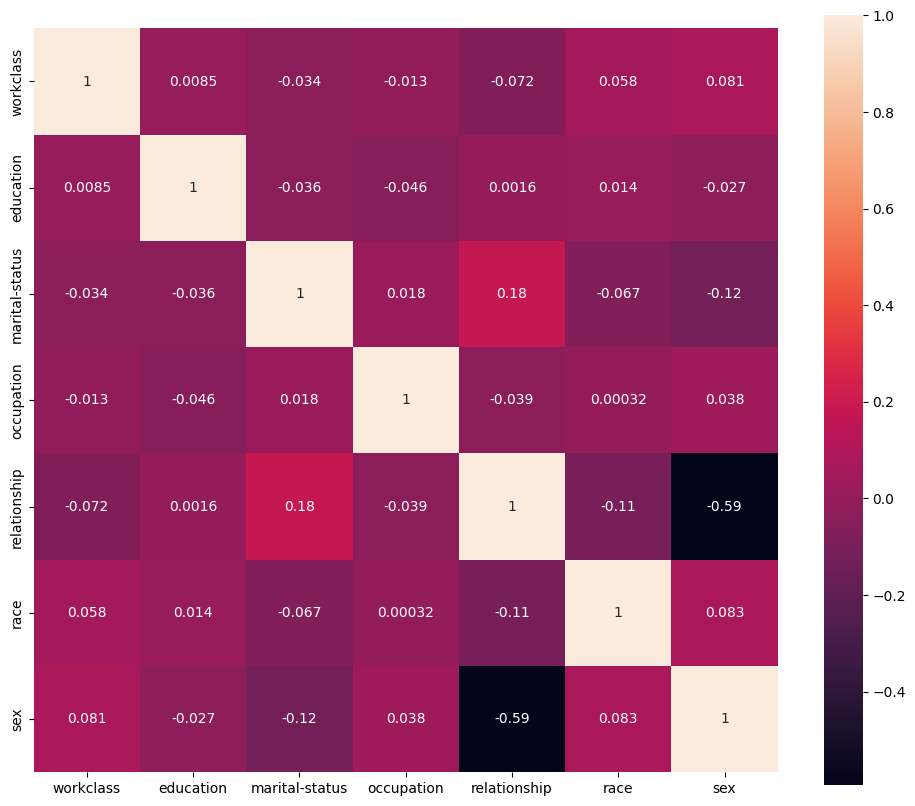

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), square = True, annot=True)
plt.show()

In [ ]:
import pandas as pd

# Crosstabulation of relationship and sex
crosstab = pd.crosstab(cat_data['relationship'], cat_data['sex'])
print(crosstab)

sex             Female  Male
relationship                
Husband              1  5976
Not-in-family     1697  2029
Other-relative     192   247
Own-child         1053  1265
Unmarried         1186   336
Wife               751     1


# One-hot признаки

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# в случае, если появляется неизвестных новых - игнорируем
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# выбираем какие на основе каких признаков производить преобразования
ohe.fit(encoded_data)
# производим преобразования категориальных
encoded_data_data = ohe.transform(encoded_data)

cat_encoded = pd.DataFrame(encoded_data_data, index=encoded_data.index, columns=ohe.get_feature_names_out(encoded_data.columns))
print(cat_encoded.head(10))

   workclass_0  workclass_1  workclass_2  workclass_3  workclass_4  \
0          0.0          1.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          1.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   
5          0.0          0.0          0.0          0.0          1.0   
6          1.0          0.0          0.0          0.0          0.0   
7          0.0          0.0          1.0          0.0          0.0   
8          0.0          0.0          0.0          0.0          1.0   
9          1.0          0.0          0.0          0.0          0.0   

   workclass_5  workclass_6  workclass_7  workclass_8  education_0  ...  \
0          0.0          0.0          0.0          0.0          0.0  ...   
1          0.0          0.0          0.0          0.0          0.0  ...   
2   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Hазобьем данные на train и test в соотношении 70:30.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_real_data, test_real_data, \
train_cat_data, test_cat_data, train_one_hot_data, test_one_hot_data, \
y_train, y_test = train_test_split(data, real_data,
                                   cat_data, cat_encoded,
                                   y, train_size=0.7)

In [ ]:
train_real_data = pd.DataFrame(train_real_data)
test_real_data = pd.DataFrame(test_real_data)

In [ ]:
train_data_for_forest = pd.concat([train_real_data, train_one_hot_data], axis='columns')
test_data_for_forest = pd.concat([test_real_data, test_one_hot_data], axis='columns')

In [ ]:
train_data_for_lg = pd.concat([train_real_data, train_one_hot_data], axis='columns')
test_data_for_lg = pd.concat([test_real_data, test_one_hot_data], axis='columns')

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_data_for_lg = std.fit_transform(train_data_for_lg)
test_data_for_lg = std.transform(test_data_for_lg)


In [ ]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       14734 non-null  object
 1   education       14734 non-null  object
 2   marital-status  14734 non-null  object
 3   occupation      14734 non-null  object
 4   relationship    14734 non-null  object
 5   race            14734 non-null  object
 6   sex             14734 non-null  object
dtypes: object(7)
memory usage: 805.9+ KB


In [ ]:
cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   workclass_0       14734 non-null  float64
 1   workclass_1       14734 non-null  float64
 2   workclass_2       14734 non-null  float64
 3   workclass_3       14734 non-null  float64
 4   workclass_4       14734 non-null  float64
 5   workclass_5       14734 non-null  float64
 6   workclass_6       14734 non-null  float64
 7   workclass_7       14734 non-null  float64
 8   workclass_8       14734 non-null  float64
 9   education_0       14734 non-null  float64
 10  education_1       14734 non-null  float64
 11  education_2       14734 non-null  float64
 12  education_3       14734 non-null  float64
 13  education_4       14734 non-null  float64
 14  education_5       14734 non-null  float64
 15  education_6       14734 non-null  float64
 16  education_7       14734 non-null  float6

## Модель Logistic regression
* В этом коде используется логистическая регрессия и GridSearchCV для подбора наилучших гиперпараметров модели. Оценка модели с использованием перекрестной проверки для улучшения обобщающей способности.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_lg = LogisticRegression(class_weight='balanced')
# сетку, по которой будем искать
param_grid = {
    'C': np.logspace(-5, -3, 10),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

# создадание объекта GridSearchCV
search_lg = GridSearchCV(model_lg, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search_lg.fit(train_data_for_lg, y_train)

# выведем наилучшие параметры
print(search_lg.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

{'C': 1e-05, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* Создан объект `LogisticRegression` с балансировкой классов.
* Задана сетка гиперпараметров для поиска, включающая регуляризационные параметры (C), типы штрафов (penalty), методы оптимизации (solver) и максимальное количество итераций (max_iter).
* Настроен объект `GridSearchCV`, который будет искать лучшие параметры модели по сетке с использованием перекрестной проверки (cv=5) и оценки модели по метрике `ROC AUC`.
* Выполнен поиск по сетке гиперпараметров на обучающих данных (`train_data_for_lg` и `y_train`).

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
search_lg.best_estimator_

LogisticRegression(C=1e-05, class_weight='balanced', penalty='none',
                   solver='sag')

In [ ]:
test_y_pred_lg = search_lg.best_estimator_.predict(test_data_for_lg)
test_auc_lg = roc_auc_score(y_test, test_y_pred_lg )
print(test_auc_lg)

0.8131725079013503


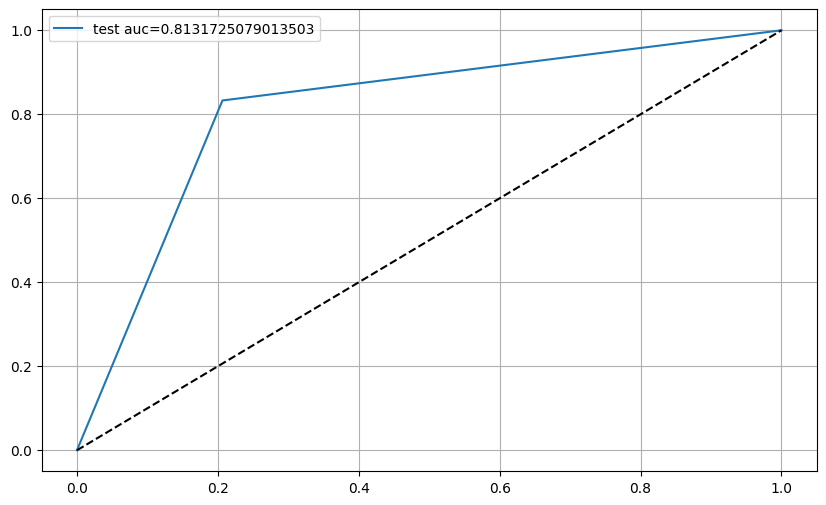

In [ ]:
test_y_pred_lg = search_lg.best_estimator_.predict(test_data_for_lg)
test_auc_lg = roc_auc_score(y_test, test_y_pred_lg )


plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_test, test_y_pred_lg)[:2],
         label=f'test auc={test_auc_lg}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

## Модель `RandomForestClassifier` из `sklearn.ensemble`.
* Подобрать для случайного леса оптимальный параметр глубины. Выбор параметра производить с помощью кросс-валидации на 5 фолдов, используя метод `cross_val_score` из `sklearn.model_selection`.
* Обучить окончательную модель на `train_data`, а на `test_data` считать итоговое качество.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Создадим полную матрицу объекты-признаки. Используем числовые и one-hot данные.

In [ ]:
depths = np.arange(3, 20)
rf_metrics = []

for depth in depths:
    mdl = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    mdl.fit(train_one_hot_data, y_train)
    scores = cross_val_score (mdl,test_one_hot_data,y_test,cv=5)

    rf_metrics.append(np.mean(scores))

Построим график получившейся метрики в зависимости от параметра `depth`.

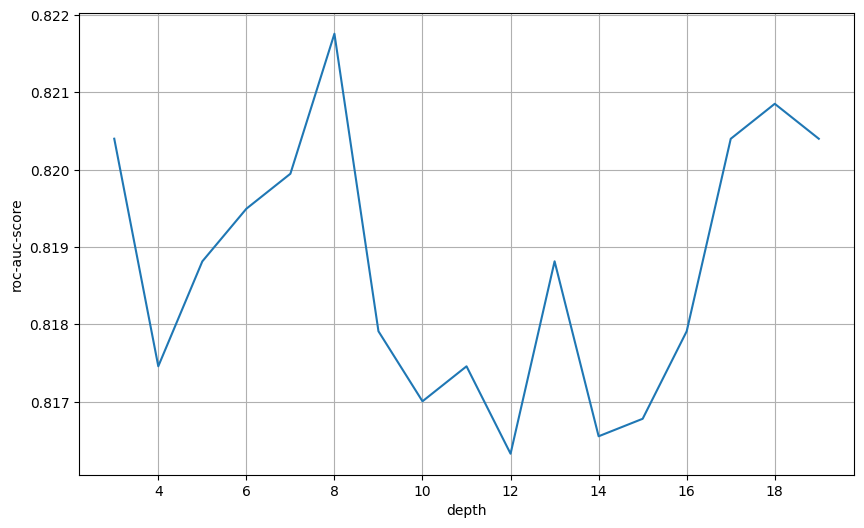

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), rf_metrics)
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()

In [ ]:
train_data_for_forest.columns = train_data_for_forest.columns.astype(str)
test_data_for_forest.columns = test_data_for_forest.columns.astype(str)

In [ ]:

train_data_for_forest.fillna(train_data_for_forest.mean(), inplace=True)
test_data_for_forest.fillna(test_data_for_forest.mean(), inplace=True)

* После определение наилучшей глубины дерева, глубина дерева установлена на 8 (best_depth = 8).
* Создание модели случайного леса: Инициализирован объект RandomForestClassifier с 100 деревьями.
* Обучение модели: Модель обучена на данных train_data_for_forest и метках y_train.
* Получены предсказания вероятностей для обучающих данных (train_y_pred_forest).
* Получены предсказания вероятностей для тестовых данных (test_y_pred_forest).

In [ ]:
best_depth = 8

model = RandomForestClassifier(n_estimators=100, max_depth=best_depth)
model.fit (train_data_for_forest, y_train)

train_y_pred_forest = model.predict_proba(train_data_for_forest)[:, 1]
test_y_pred_forest =model.predict_proba(test_data_for_forest)[:, 1]

Вычисление ROC-AUC на обучающем и тестовом множестве.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
train_auc = roc_auc_score(y_train,train_y_pred_forest)
test_auc = roc_auc_score(y_test,test_y_pred_forest)

*  Построение ROC-кривой для оценки производительности модели случайного леса на обучающих и тестовых данных.

In [ ]:
assert test_auc > 0.90

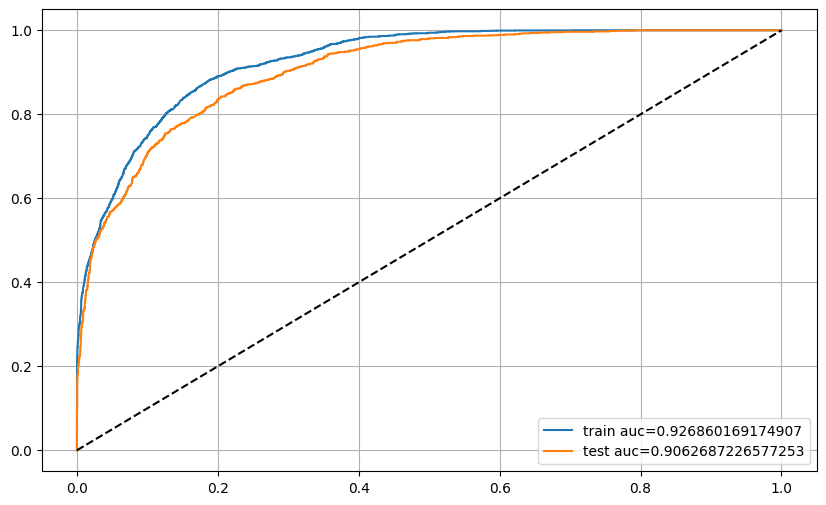

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, train_y_pred_forest)[:2],
         label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_forest)[:2],
         label=f'test auc={test_auc}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

In [ ]:
import joblib
filename = 'random_forest_model.joblib'
joblib.dump(model, filename)

['random_forest_model.joblib']

* Модель случайного леса показала лучшую производительность с AUC = 0.906 по сравнению с логистической регрессией, у которой AUC = 0.813.
* Это указывает на то, что случайный лес лучше справляется с классификацией в данном наборе данных, обеспечивая более высокую точность и чувствительность.

# Обучение градиентного бустинга
 Использована библиотека XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
class_counts = y_train.value_counts()
class_weight = class_counts[0] / class_counts[1]

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),  # Minimum loss reduction required to make a further partition on a leaf node
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),  # L1 regularization term on weights
        'lambda': trial.suggest_float('lambda', 0.0, 1.0),  # L2 regularization term on weights
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'tree_method': 'hist',  # Faster method for building histograms
        'booster': 'gbtree',  # Use tree-based models
        'objective': 'binary:logistic',  # Binary classification problem
        'scale_pos_weight': class_weight,  # Set the class weights (as calculated previously)
        'seed': 42
}


    model = xgb.XGBClassifier(**params)

    model.fit(train_data_for_lg, y_train)
    y_val_pred = model.predict(test_data_for_lg)

    return f1_score(y_test, y_val_pred)

# Создать обучение
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Вывести лучшие гиперпараметры
print("Best F1-score: {:.4f}".format(study.best_value))
print("Best Hyperparameters:")
best_params = study.best_params
for key, value in best_params.items():
    print(f"{key}: {value}")




[I 2024-06-25 06:56:02,457] A new study created in memory with name: no-name-09012e10-1a65-4918-935e-e433c0c3acd2
[I 2024-06-25 06:56:02,759] Trial 0 finished with value: 0.7040695377321218 and parameters: {'learning_rate': 0.0906531329962132, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.8093506371598767, 'colsample_bytree': 0.9760707751170872, 'gamma': 0.7565208041575849, 'alpha': 0.8203475987441075, 'lambda': 0.432618883722958, 'n_estimators': 59}. Best is trial 0 with value: 0.7040695377321218.
[I 2024-06-25 06:56:03,101] Trial 1 finished with value: 0.6749633967789166 and parameters: {'learning_rate': 0.016052929587691504, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.8920751789334642, 'colsample_bytree': 0.9408008996562978, 'gamma': 0.9092692490370833, 'alpha': 0.45052376018289086, 'lambda': 0.48748476674520136, 'n_estimators': 79}. Best is trial 0 with value: 0.7040695377321218.
[I 2024-06-25 06:56:04,106] Trial 2 finished with value: 0.7040650406504064 and param

Best F1-score: 0.7194
Best Hyperparameters:
learning_rate: 0.07620182847175795
max_depth: 7
min_child_weight: 4
subsample: 0.9972068559572511
colsample_bytree: 0.61686443139489
gamma: 0.10098704410250414
alpha: 0.2540608699557795
lambda: 0.31002389625275484
n_estimators: 190


In [ ]:
print("Shape of train_data_for_lg:", train_data_for_lg.shape)
print("Shape of y_train:", y_train.shape)

# Проверка размеров тестовых данных
print("Shape of test_data_for_lg:", test_data_for_lg.shape)
print("Shape of y_test:", y_test.shape)

Shape of train_data_for_lg: (10313, 66)
Shape of y_train: (10313,)
Shape of test_data_for_lg: (4421, 66)
Shape of y_test: (4421,)


In [ ]:
# Инициализировать XGBClassifier с наилучшими параметрами
best_model = xgb.XGBClassifier(**best_params)

# Обучить модель с наилучшими параметрами
best_model.fit(train_data_for_lg, y_train)

# С лучшим моделем предсказать
y_test_pred = best_model.predict(test_data_for_lg)

# Оценить модель
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("F1-score:", test_f1)
print("ROC-AUC:", test_roc_auc)

F1-score: 0.70383631713555
ROC-AUC: 0.7902268546428558


## Использовать библиотеку Catboost. Catboost --- это библиотека для градиентного бустинга

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
train_cat_data = train_cat_data.fillna('unknown')
test_cat_data = test_cat_data.fillna('unknown')

* Подготавливание данные для обучения модели градиентного бустинга с использованием библиотеки CatBoost. Он включает объединение числовых и категориальных данных, а также создание объектов Pool, необходимых для обучения и тестирования модели CatBoost.

Pool - специальный объект из библиотеки CatBoost, который позволяет указать данные, метки и индексы категориальных признаков для корректного обучения модели.

Сдвиг индексов помогает указать правильные столбцы в объединенном DataFrame.

In [ ]:
train_data_for_boosting = pd.concat([train_real_data,train_cat_data], axis='columns')
test_data_for_boosting =  pd.concat([test_real_data,test_cat_data], axis='columns')

cat_features = np.arange(train_cat_data.shape[1]) + train_real_data.shape[1]

train_dataset = Pool(data=train_data_for_boosting,
                     label=y_train,
                     cat_features=cat_features)

test_dataset =  Pool(data=test_data_for_boosting,
                     label=y_test,
                     cat_features=cat_features)

Для каждого значения depth от 3 до 16 включительно подсчитать результаты кросс-валидации.  Исследовать как различные глубины деревьев влияют на производительность модели градиентного бустинга на основе метрики AUC.

Функция cv возвращает pd.DataFrame с метриками обучения.

In [ ]:
depths = np.arange(3, 17)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "Logloss",
              "custom_loss": "AUC",
              "verbose": False}

    scores = cv(train_dataset,
            params,
            fold_count=5,
            plot="True")
    #print (list(scores['test-AUC-mean'][-1:].values)[0])
    boosting_metrics.append(list(scores['test-AUC-mean'][-1:].values)[0])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3106631072
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3305306987
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3330396257
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3236253028
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3296711253
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3036172343
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3243196858
bestIteration = 99

Training on fold [2/5]

bestTest = 0.324998707
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3171876982
bestIteration = 99

Training on fold [4/5]

bestTest = 0.322661916
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2992149209
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3198811809
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3206049809
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3135349747
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3179739526
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2951818477
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3151383432
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3177833355
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3078980569
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3138221029
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2946637756
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3153914701
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3158456785
bestIteration = 98

Training on fold [3/5]

bestTest = 0.3061992327
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3127622174
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2913832636
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3137238943
bestIteration = 99

Training on fold [2/5]

bestTest = 0.313023323
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3053040464
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3120340638
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2921318354
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3127092715
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3127902383
bestIteration = 98

Training on fold [3/5]

bestTest = 0.3058829132
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3109152755
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2916862211
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3133429704
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3149886135
bestIteration = 99

Training on fold [3/5]

bestTest = 0.303104847
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3117646947
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2907711706
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3130089326
bestIteration = 95

Training on fold [2/5]

bestTest = 0.3113381889
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3031036421
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3114706797
bestIteration = 96



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2921587236
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3136801355
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3126937079
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3027000296
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3110664206
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2948135672
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3161239302
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3143028154
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3028109682
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3124630243
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2948930808
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3159554334
bestIteration = 94

Training on fold [2/5]

bestTest = 0.3148033112
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3049029316
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3099089135
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.295383892
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3160615661
bestIteration = 96

Training on fold [2/5]

bestTest = 0.3144751421
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3043897026
bestIteration = 98

Training on fold [4/5]

bestTest = 0.3117631114
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.294737017
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3184094485
bestIteration = 87

Training on fold [2/5]


* График для визуализации зависимости метрики AUC от глубины деревьев в модели градиентного бустинга

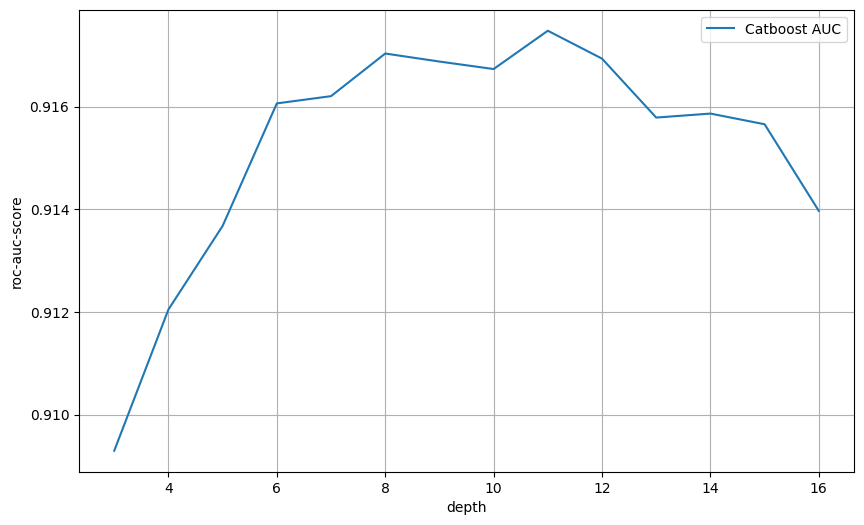

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 17), boosting_metrics, label='Catboost AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

* Обучение модели градиентного бустинга с предварительно определенной оптимальной глубиной деревьев `best_depth` = 11

In [ ]:
best_depth = 11

model = CatBoostClassifier(iterations=500,depth =best_depth,loss_function='Logloss',verbose=False)
model.fit(train_dataset)


train_y_pred_boosting = model.predict_proba(train_dataset)[:, 1]
test_y_pred_boosting = model.predict_proba(test_dataset)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, train_y_pred_boosting)
test_auc =  roc_auc_score(y_test, test_y_pred_boosting)

* График ROC-кривой для модели градиентного бустинга на тренировочных и тестовых данных.

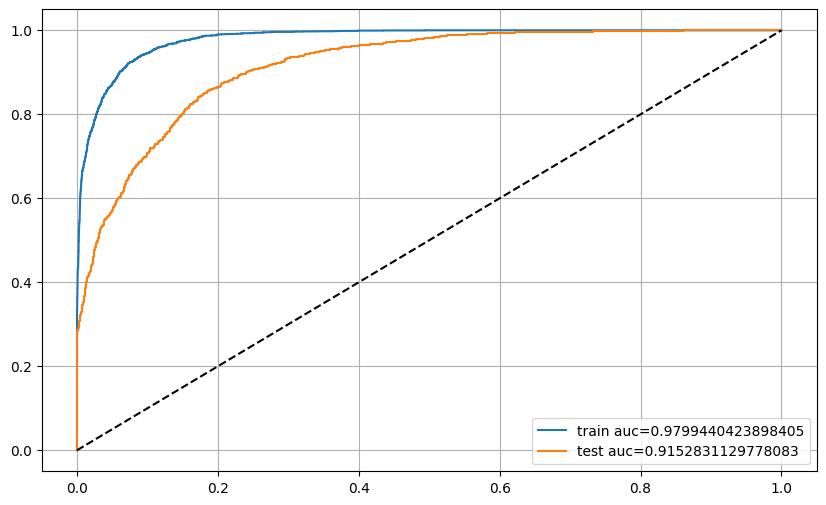

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, train_y_pred_boosting)[:2],
         label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_boosting)[:2],
         label=f'test auc={test_auc}')

plt.plot([0,1], [0,1], '--', color='black')

plt.legend()
plt.grid()

### Вывод по сравнению моделей

При сравнении различных моделей машинного обучения на основе метрики ROC-AUC  для задачи классификации, следующие результаты были получены:

1. CatBoost показал наилучшую производительность с AUC = 0.915. Этот результат объясняется тем, что CatBoost специализируется на работе с категориальными данными и может адаптироваться к разнообразным условиям задачи благодаря эффективной стратегии управления градиентами.

2. Случайный лес (Random Forest) демонстрировал хорошие результаты с AUC = 0.906. Эта модель эффективна в обработке больших объемов данных и способна к достаточно точной классификации благодаря ансамблю решающих деревьев, которые работают параллельно и позволяют устойчиво работать с выбросами и нелинейными зависимостями.

  
### Вывод:

Исходя из анализа, для данной задачи наиболее эффективными моделями являются CatBoost и случайный лес.